# Análise de Jogos da Steam - Fase 2

Este notebook contém a análise solicitada na fase 2 do projeto, incluindo:
- Pré-processamento dos dados
- Respostas às perguntas da empresa
- Visualizações solicitadas
- Pergunta e visualização adicional

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Adicionar o diretório raiz ao path para importar os módulos
sys.path.append(os.path.abspath('../..'))

# Importar funções criadas
from src.fase2.preprocessamento import preprocess_data, save_processed_data
from src.fase2.visualizacao import set_custom_style, plot_os_support

# Configurações de exibição do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)

In [4]:
# Caminho para o arquivo de dados
data_path = '../../data/raw/steam_games.csv'

# Carregar os dados
df_raw = pd.read_csv(data_path)

# Exibir informações básicas sobre os dados
print(f"Quantidade de registros: {df_raw.shape[0]}")
print(f"Quantidade de colunas: {df_raw.shape[1]}")

# Visualizar as primeiras linhas
df_raw.head()

Quantidade de registros: 72934
Quantidade de colunas: 39


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [5]:
# Pré-processar os dados
df = preprocess_data(df_raw)

# Configurar o estilo personalizado para os gráficos
colors = set_custom_style()

# Salvar os dados processados
save_processed_data(df)

# Verificar as transformações
df.head()

Dados processados salvos em ../../data/processed/steam_games_processed.csv


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,metacritic_score,release_date,release_year,positive,negative,price,dlc_count,supports_windows,supports_mac,supports_linux,categories_list,genres_list,screenshots,movies,demo_material,is_paid,name,publisher,developer
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0,2008-10-21,2008.0,6,11,19.99,0,True,False,False,"[Single-player,Multi-player,Steam Achievements...","[Casual,Indie,Sports]",0.0,0.0,0.0,True,Galactic Bowling,Perpetual FX Creative,Perpetual FX Creative
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0,2017-10-12,2017.0,53,5,0.99,0,True,True,False,"[Single-player,Steam Achievements,Full control...","[Action,Indie]",0.0,0.0,0.0,True,Train Bandit,Wild Rooster,Rusty Moyher
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0,2021-11-17,2021.0,0,0,4.99,0,True,False,False,[Single-player],"[Action,Adventure,Indie,Strategy]",0.0,0.0,0.0,True,Jolt Project,Campião Games,Campião Games
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0,2020-07-23,2020.0,3,0,5.99,0,True,True,True,"[Single-player,Full controller support]","[Adventure,Casual,Indie]",0.0,0.0,0.0,True,Henosis™,Odd Critter Games,Odd Critter Games
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Stea

## Perguntas da Empresa Fun Corp.

Nesta seção, responderemos às perguntas solicitadas pela empresa.

### Pergunta 1: Quais são os dez jogos mais bem avaliados, de acordo com o Metacritic?

No caso de notas repetidas, os jogos devem ser ordenados de acordo com suas datas de lançamento (do mais velho para o mais recente).

In [27]:
# Filtrar para jogos com pontuação Metacritic válida
metacritic_df = df.dropna(subset=['metacritic_score'])

# Ordenar por pontuação (decrescente) e data de lançamento (crescente)
sorted_games = metacritic_df.sort_values(['metacritic_score', 'release_date'], ascending=[False, True])

# Remover duplicatas baseadas no nome do jogo (keep='first' mantém a primeira ocorrência)
unique_games = sorted_games.drop_duplicates(subset=['name'], keep='first')

# Pegar os 10 primeiros
top_games = unique_games.head(10)

# Selecionar apenas as colunas relevantes
top_games_display = top_games[['name', 'metacritic_score', 'release_date']]

print("Os dez jogos mais bem avaliados de acordo com o Metacritic:")
top_games_display

Os dez jogos mais bem avaliados de acordo com o Metacritic:


,name,metacritic_score,release_date
45752,Disco Elysium - The Final Cut,97,2019-10-15
64935,Persona 5 Royal,97,2022-10-20
49557,Half-Life,96,1998-11-08
36775,Half-Life 2,96,2004-11-16
32406,BioShock™,96,2007-08-21
57205,Grand Theft Auto V,96,2015-04-13
28170,Portal 2,95,2011-04-18
12746,Sid Meier's Civilization® IV,94,2006-10-25
37184,QUAKE,94,2007-08-03
19291,The Elder Scrolls IV: Oblivion® Game of the Ye...,94,2009-06-16


### Pergunta 2: Para jogos de role-playing, qual o número médio e máximo de DLCs, avaliações positivas, avaliações negativas e materiais de demonstração?

In [51]:
# Função para contar o número de itens em uma string separada por vírgulas
def count_items(url_string):
    if pd.isna(url_string) or url_string == '':
        return 0
    # Conta o número de URLs (número de vírgulas + 1)
    return url_string.count(',') + 1

# Filtrar jogos de RPG
rpg_filter = df['Genres'].str.contains('RPG|role-playing', case=False, na=False)
rpg_count = rpg_filter.sum()

# Calcular estatísticas sem modificar o DataFrame original
screenshots_counts = df.loc[rpg_filter, 'Screenshots'].apply(count_items)
movies_counts = df.loc[rpg_filter, 'Movies'].apply(count_items)
demo_material = screenshots_counts + movies_counts

# Calcular outras estatísticas diretamente
dlc_mean = df.loc[rpg_filter, 'dlc_count'].mean()
dlc_max = df.loc[rpg_filter, 'dlc_count'].max()
positive_mean = df.loc[rpg_filter, 'positive'].mean()
positive_max = df.loc[rpg_filter, 'positive'].max()
negative_mean = df.loc[rpg_filter, 'negative'].mean()
negative_max = df.loc[rpg_filter, 'negative'].max()

# Criar estatísticas sem formatação prévia
stats = {
    'DLCs - Média': dlc_mean,
    'DLCs - Máximo': dlc_max,
    'Avaliações Positivas - Média': positive_mean,
    'Avaliações Positivas - Máximo': positive_max,
    'Avaliações Negativas - Média': negative_mean,
    'Avaliações Negativas - Máximo': negative_max,
    'Material de Demonstração - Média': demo_material.mean(),
    'Material de Demonstração - Máximo': demo_material.max()
}

# Criar DataFrame para exibição
stats_df = pd.DataFrame(list(stats.items()), columns=['Estatística', 'Valor'])

# Aplicar formatação apenas na exibição (não modifica os valores originais)
pd.options.display.float_format = '{:.2f}'.format

# Mostrar o número de jogos encontrados
print(f"Número total de jogos de RPG encontrados: {rpg_count}")
stats_df

Número total de jogos de RPG encontrados: 12296


,Estatística,Valor
0,DLCs - Média,0.95
1,DLCs - Máximo,2366.00
2,Avaliações Positivas - Média,1516.41
3,Avaliações Positivas - Máximo,964983.00
4,Avaliações Negativas - Média,247.17
5,Avaliações Negativas - Máximo,129925.00
6,Material de Demonstração - Média,11.32
7,Material de Demonstração - Máximo,187.00


### Pergunta 3: Quais são as cinco empresas que mais publicam jogos pagos na plataforma? 

Para tais empresas, qual o número médio e mediano de avaliações positivas de seus jogos pagos?

In [ ]:
# Filtrar jogos pagos
paid_games = df[df['is_paid'] == True]

# Contar número de jogos pagos por publisher
top_publishers = paid_games['publisher'].value_counts().reset_index()
top_publishers.columns = ['Publisher', 'Número de Jogos Pagos']
top_publishers = top_publishers.head(5)

# Calcular estatísticas de avaliações positivas para cada publisher
publisher_stats = []

for publisher in top_publishers['Publisher']:
    publisher_games = paid_games[paid_games['publisher'] == publisher]
    
    stats = {
        'Publisher': publisher,
        'Número de Jogos': len(publisher_games),
        'Avaliações Positivas - Média': publisher_games['positive'].mean(),
        'Avaliações Positivas - Mediana': publisher_games['positive'].median()
    }
    
    publisher_stats.append(stats)

# Criar DataFrame para melhor visualização
publisher_stats_df = pd.DataFrame(publisher_stats)
publisher_stats_df

,Publisher,Número de Jogos,Avaliações Positivas - Média,Avaliações Positivas - Mediana
0,Big Fish Games,443,7.36,5.00
1,8floor,239,4.46,3.00
2,Strategy First,162,276.45,23.00
3,Laush Studio,157,19.78,12.00
4,HH-Games,156,10.54,9.00


### Pergunta 4: O número de jogos que suportam o sistema operacional Linux cresceu entre 2018 e 2022?

In [81]:
# Filtrar jogos lançados entre 2018 e 2022
linux_trend = df[(df['release_year'] >= 2018) & (df['release_year'] <= 2022)]

# Agrupar por ano e contar jogos com suporte Linux
linux_by_year = linux_trend.groupby('release_year')['supports_linux'].agg(['sum', 'count']).reset_index()
linux_by_year['percentage'] = (linux_by_year['sum'] / linux_by_year['count']) * 100

# Converter o ano para inteiro
linux_by_year['Ano'] = linux_by_year['release_year'].astype(int)

# Renomear colunas e selecionar apenas as necessárias
linux_by_year = linux_by_year[['Ano', 'sum', 'count', 'percentage']]
linux_by_year.columns = ['Ano', 'Jogos com Linux', 'Total de Jogos', 'Percentual (%)']

# Arredondar o percentual para duas casas decimais
linux_by_year['Percentual (%)'] = linux_by_year['Percentual (%)'].round(2)

# Visualizar os resultados
linux_by_year

,Ano,Jogos com Linux,Total de Jogos,Percentual (%)
0,2018,1187,7837,15.15
1,2019,922,7600,12.13
2,2020,1082,9459,11.44
3,2021,1210,12290,9.85
4,2022,1311,13951,9.40


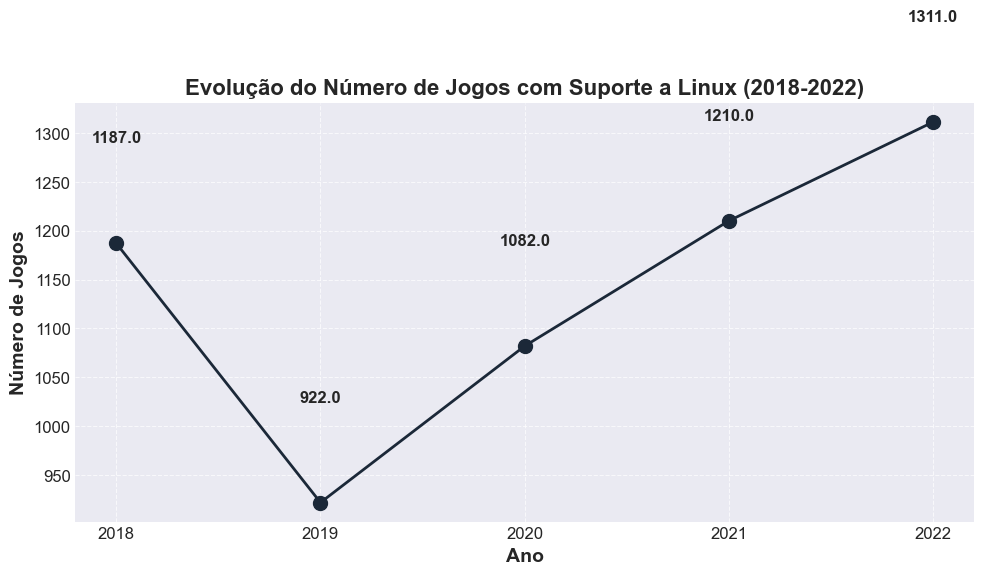

In [30]:
# Visualizar a tendência em um gráfico
plt.figure(figsize=(10, 6))
plt.plot(linux_by_year['Ano'], linux_by_year['Jogos com Linux'], marker='o', markersize=10, linewidth=2, color=colors[0])
plt.title('Evolução do Número de Jogos com Suporte a Linux (2018-2022)')
plt.xlabel('Ano')
plt.ylabel('Número de Jogos')
plt.xticks(linux_by_year['Ano'])
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar os valores em cada ponto
for i, row in linux_by_year.iterrows():
    plt.text(row['Ano'], row['Jogos com Linux'] + 100, f"{row['Jogos com Linux']}", 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Visualizações Solicitadas pela Empresa

### Gráfico 1: Percentual de jogos que possuem suporte para cada sistema operacional

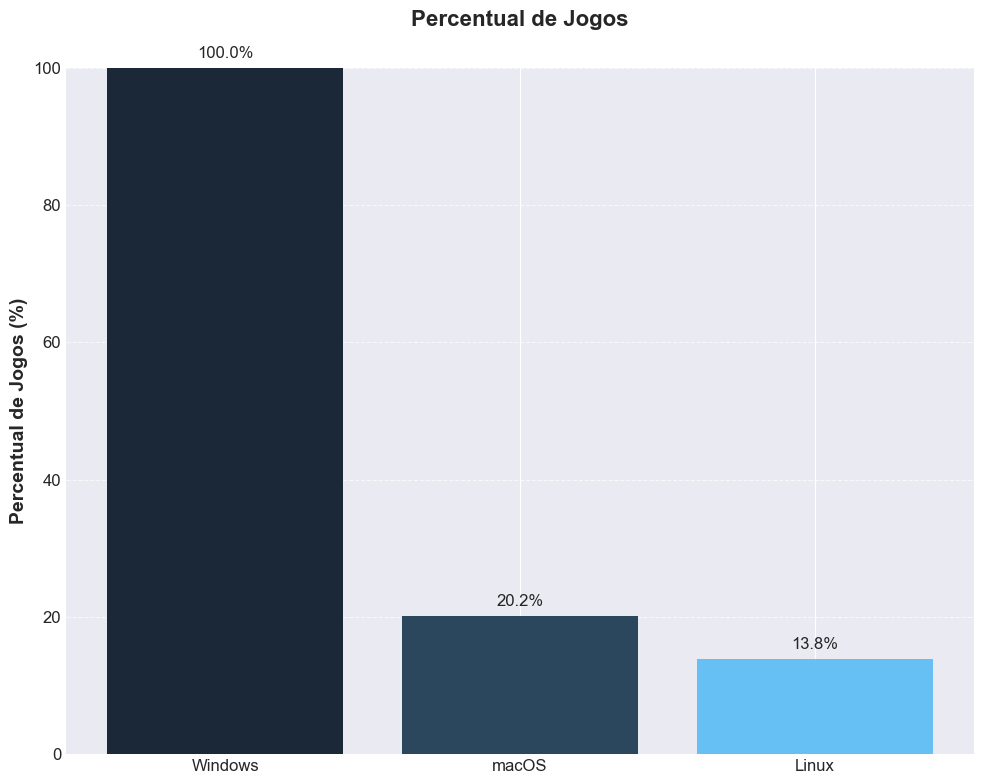

In [60]:
# Gerar o gráfico de suporte a sistemas operacionais usando a função importada
os_plot = plot_os_support(df)

# Ajustar a posição do título para evitar sobreposição
plt.title("Percentual de Jogos", pad=30)

# Aplicar layout ajustado
plt.tight_layout()
plt.show()

### Gráfico 2: Número total de jogos single-player do gênero Indie e estratégia lançados por ano entre 2010 e 2020

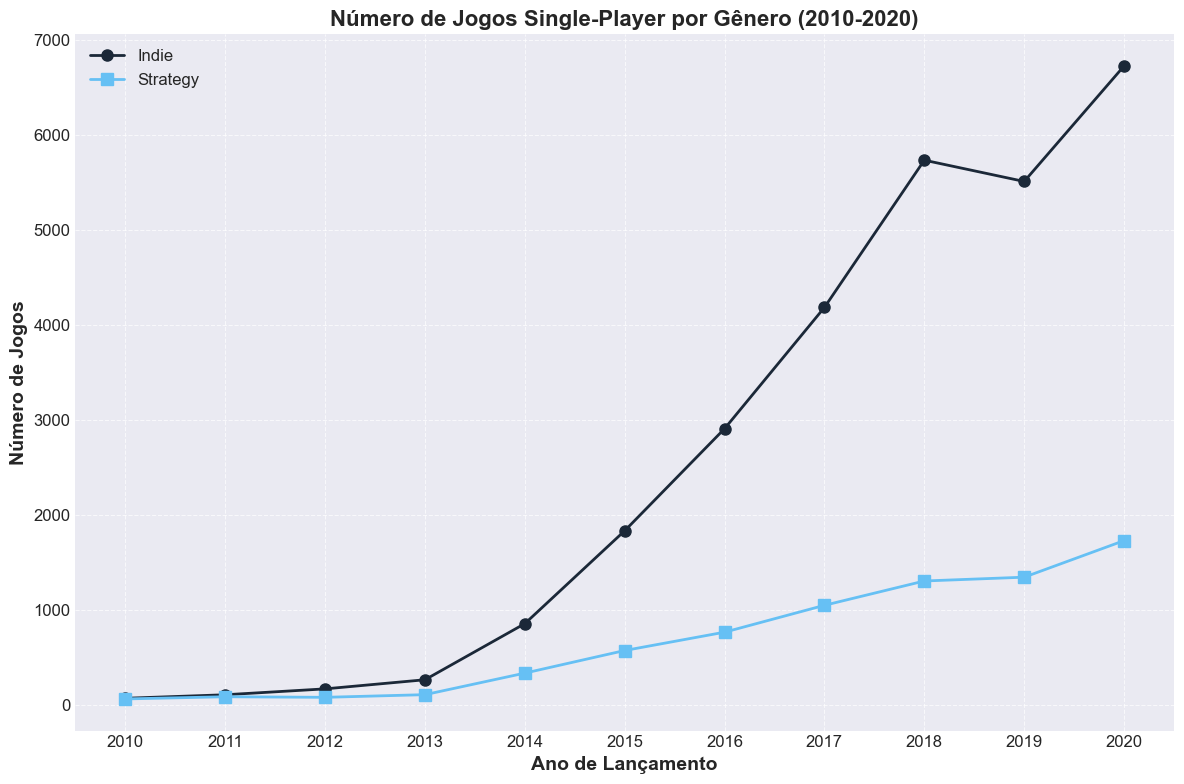

In [61]:
# Filtrar jogos entre 2010 e 2020
time_range = df[(df['release_year'] >= 2010) & (df['release_year'] <= 2020)]

# Filtrar jogos single-player
single_player = time_range[time_range['Categories'].str.contains('Single-player', case=False, na=False)]

# Filtrar jogos de cada gênero
indie_games = single_player[single_player['Genres'].str.contains('Indie', case=False, na=False)]
strategy_games = single_player[single_player['Genres'].str.contains('Strategy', case=False, na=False)]

# Contar por ano
indie_by_year = indie_games.groupby('release_year').size()
strategy_by_year = strategy_games.groupby('release_year').size()

# Criar figura
plt.figure(figsize=(12, 8))

# Plotar linhas
plt.plot(indie_by_year.index, indie_by_year.values, 'o-', linewidth=2, markersize=8, color=colors[0], label='Indie')
plt.plot(strategy_by_year.index, strategy_by_year.values, 's-', linewidth=2, markersize=8, color=colors[2], label='Strategy')

# Adicionar elementos visuais
plt.title('Número de Jogos Single-Player por Gênero (2010-2020)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Configurar eixo x
plt.xticks(range(2010, 2021))

plt.tight_layout()
plt.show()

## Pergunta e Visualização Adicional

### Pergunta Adicional: Quais os gêneros mais populares?

In [80]:
# Identificar os 10 gêneros mais populares
genre_counts = {}
for genres in df['genres_list']:
    for genre in genres:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Obter os 10 principais gêneros
top_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10]
top_genre_names = [genre[0] for genre in top_genres]

print("Os 10 gêneros mais populares:")
for i, (genre, count) in enumerate(top_genres, 1):
    print(f"{i}. {genre}: {count} jogos")

Os 10 gêneros mais populares:
1. Casual,Indie: 4210 jogos
2. Action,Indie: 3952 jogos
3. Action,Adventure,Indie: 3211 jogos
4. Adventure,Indie: 2759 jogos
5. Action,Casual,Indie: 2243 jogos
6. Adventure,Casual,Indie: 2232 jogos
7. Indie: 2212 jogos
8. Casual: 2057 jogos
9. Action: 1981 jogos
10. Adventure: 1321 jogos


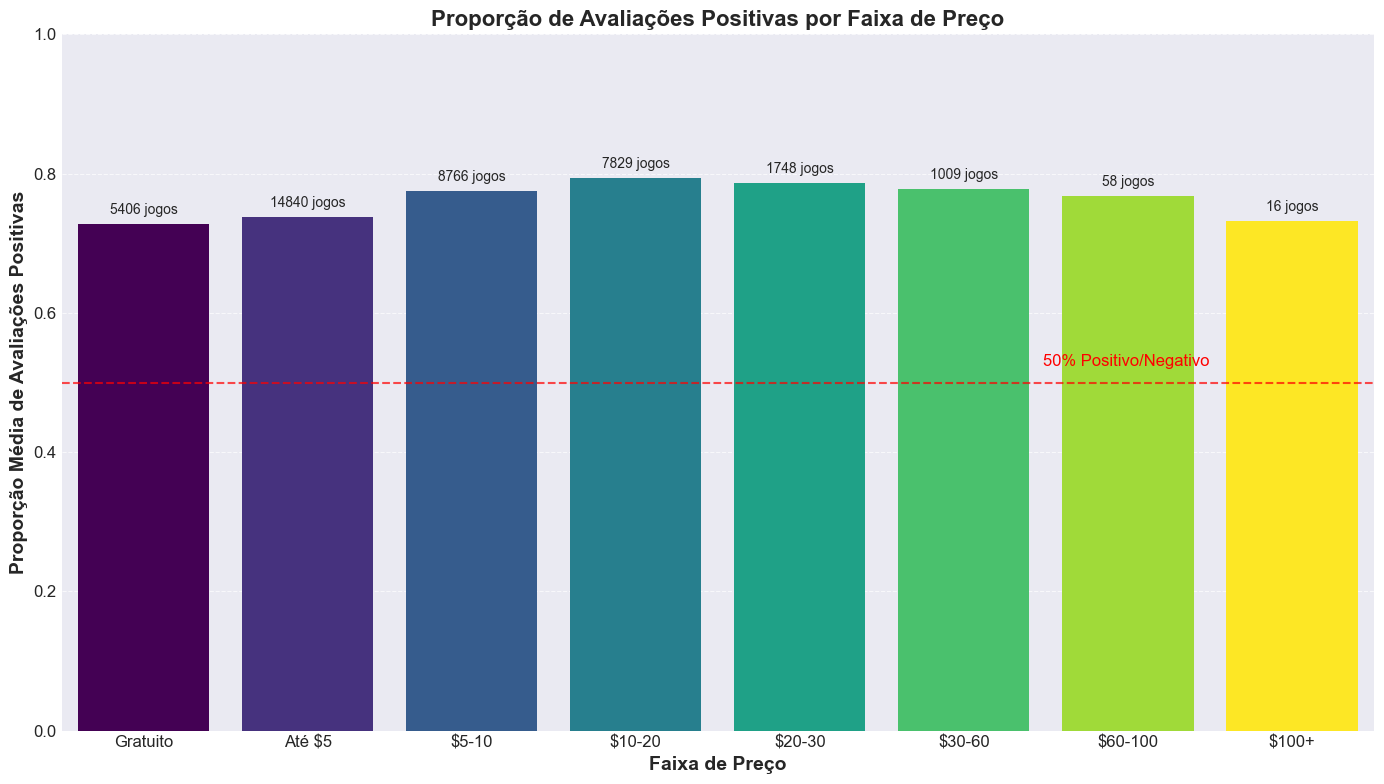

In [75]:
# Criar faixas de preço incluindo todos os jogos gratuitos corretamente
df['price_range'] = pd.cut(
    df['price'], 
    bins=[-0.001, 0.01, 5, 10, 20, 30, 60, 100, 1000],
    labels=['Gratuito', 'Até $5', '$5-10', '$10-20', '$20-30', '$30-60', '$60-100', '$100+']
)

# Tratar jogos com preço NaN como gratuitos também
df.loc[df['price'].isna(), 'price_range'] = 'Gratuito'

# Filtrar jogos com número mínimo de avaliações
min_reviews = 10
ratings_df = df[(df['positive'] + df['negative']) >= min_reviews].copy()

# Calcular proporção de avaliações positivas
ratings_df['pos_ratio'] = ratings_df['positive'] / (ratings_df['positive'] + ratings_df['negative'])  # Corrigido usando ratings_df

# Agrupar por faixa de preço (com observed=True para eliminar o warning)
price_stats = ratings_df.groupby('price_range', observed=True).agg({
    'pos_ratio': ['mean', 'median', 'count', 'std'],
    'AppID': 'count'
}).reset_index()

# Renomear colunas
price_stats.columns = ['Faixa de Preço', 'Média Positivas', 'Mediana Positivas', 
                       'Contagem Ratios', 'Desvio Padrão', 'Total Jogos']

# Criar visualização
plt.figure(figsize=(14, 8))

# Versão corrigida do barplot para evitar warning sobre palette
ax = sns.barplot(x='Faixa de Preço', y='Média Positivas', hue='Faixa de Preço', 
                data=price_stats, legend=False)

# Definir cores manualmente (alternativa à palette)
colors = plt.cm.viridis(np.linspace(0, 1, len(price_stats)))
for i, p in enumerate(ax.patches):
    p.set_facecolor(colors[i])

# Adicionar rótulos de contagem
for i, p in enumerate(ax.patches):
    count = price_stats.iloc[i]['Total Jogos']
    ax.annotate(f'{count} jogos', 
                (p.get_x() + p.get_width()/2., p.get_height() + 0.01),
                ha='center', va='bottom', fontsize=10)

# Adicionar linha de 50% positivo/negativo
plt.axhline(0.5, color='red', linestyle='--', alpha=0.7)
plt.text(6.5, 0.52, '50% Positivo/Negativo', color='red', fontsize=12, ha='right', va='bottom')

plt.title('Proporção de Avaliações Positivas por Faixa de Preço', fontsize=16)
plt.ylabel('Proporção Média de Avaliações Positivas', fontsize=14)
plt.xlabel('Faixa de Preço', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Conclusão

Neste notebook, realizamos uma análise completa do conjunto de dados de jogos da Steam, respondendo a diversas perguntas de negócio e criando visualizações informativas. As análises revelaram padrões interessantes sobre avaliações de jogos, gêneros populares, suporte a sistemas operacionais e tendências ao longo do tempo.